## Importing the libraries and dataset.

In [1]:
%autosave 180
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
import matplotlib.style as style

Autosaving every 180 seconds


In [2]:
# loading the training and testing dataset.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Training dataset information.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
train_data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## Feature Engineering.

In [5]:
# Transforming Occupation column.
def df_transform_Occupation(x):
    """Helper function for transforming Occupation column, to make it more informative.
    This function also inherently converts the datatype of the column to string."""
    x = "Occupation "+str(x)
    return x
train_data.Occupation=train_data.Occupation.apply(df_transform_Occupation)
test_data.Occupation=test_data.Occupation.apply(df_transform_Occupation)

In [6]:
train_data.Occupation.unique()

array(['Occupation 10', 'Occupation 16', 'Occupation 15', 'Occupation 7',
       'Occupation 20', 'Occupation 9', 'Occupation 1', 'Occupation 12',
       'Occupation 17', 'Occupation 0', 'Occupation 3', 'Occupation 4',
       'Occupation 11', 'Occupation 8', 'Occupation 19', 'Occupation 2',
       'Occupation 18', 'Occupation 5', 'Occupation 14', 'Occupation 13',
       'Occupation 6'], dtype=object)

In [7]:
# Transforming age columns
def df_transform_Age(x):
    """Helper function for Transforming Age column to make it more infromative.
    The orignal Age ranges are replace by the random values in the age range.
    For age range 55+ we have repaced those values with random values in the range 55-100."""
    if (x != '55+'):
        [min, max]=x.split('-')
        x = np.random.random_integers(int(min),int(max))
    else:
        x = np.random.random_integers(55,100)
    return x

train_data.Age=train_data.Age.apply(df_transform_Age)
test_data.Age=test_data.Age.apply(df_transform_Age)

for user in train_data.User_ID.unique():
    age=train_data.Age.loc[train_data.User_ID==user].values[0]
    train_data.Age.loc[train_data.User_ID==user]=age

for user in test_data.User_ID.unique():
    age=test_data.Age.loc[test_data.User_ID==user].values[0]
    test_data.Age.loc[test_data.User_ID==user]=age

c:\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(0, 17 + 1) instead
  
c:\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(55, 100 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
c:\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(26, 35 + 1) instead
  
c:\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(46, 50 + 1) instead
  
c:\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(51, 55 + 1) instead
  
c:\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(36, 45 + 1) instead
  
c:\python37\lib\site-packages\ipykernel_launcher.py:8: Deprecation

In [8]:
# Transforming Maritial Status column
def df_transform_Marital_Status(x):
    """Helper function for Transforming Martial_status column to make it more infromative.
    We have replaced the 0 values with Single and 1 valeus with Married.
    This function also inherently converts the datatype of the column to string."""
    if (x != 0):
        x = "Married"
    else:
        x = "Single"
    return x
train_data.Marital_Status=train_data.Marital_Status.apply(df_transform_Marital_Status)
test_data.Marital_Status=test_data.Marital_Status.apply(df_transform_Marital_Status)

In [9]:
# Transforming person staying years in current city
def df_transform_Stay_In_Current_City_Years(x):
    """Helper function for Transforming Stay_In_Current_City_Years column.
    All entries with 4+ values are repaced with random values in the range 4-10."""
    if (x == '4+'):
        x = np.random.random_integers(4,10)
    return x
train_data.Stay_In_Current_City_Years=pd.to_numeric(train_data.Stay_In_Current_City_Years.apply(df_transform_Stay_In_Current_City_Years))
test_data.Stay_In_Current_City_Years=pd.to_numeric(test_data.Stay_In_Current_City_Years.apply(df_transform_Stay_In_Current_City_Years))

c:\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(4, 10 + 1) instead
  


In [10]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
# Replacing missing values.
train_data.fillna("NA",inplace=True)
test_data.fillna("NA",inplace=True)

In [12]:
# Adding new columns.
train_data['User_Count']=train_data.groupby(['User_ID'])['User_ID'].transform('count')
train_data['Product_Count']=train_data.groupby(['Product_ID'])['Product_ID'].transform('count')
test_data['User_Count']=test_data.groupby(['User_ID'])['User_ID'].transform('count')
test_data['Product_Count']=test_data.groupby(['Product_ID'])['Product_ID'].transform('count')

In [13]:
# Counting product category count.
def Product_Category_Count(row):
    """Helper function to get the number of categories for a product."""
    count = 1
    if(row['Product_Category_2'] !="NA"):
        count += 1
    if(row['Product_Category_3'] !="NA"):
        count += 1
    return count
train_data['Product_Category_Count'] = train_data.apply(lambda row: Product_Category_Count(row), axis=1)
test_data['Product_Category_Count'] = test_data.apply(lambda row: Product_Category_Count(row), axis=1)

In [14]:
# Binning age feature
def Binned_Age(x):
    """Helper function to classify the Age column into different Age groups for a product.
    Teen Ages(0-17)
    Young Adult Ages(18-25)
    Middle Adult Ages(25-40)
    Adult Ages(40-50)
    Elderly(>50)
    """
    if int(x) <= 17 :
        x = "Teen Ages(0-17)"
    elif int(x) >= 18 and int(x)<25:
        x = 'Young Adult Ages(18-25)'
    elif int(x) >= 25 and int(x)<40:
        x = 'Middle Adult Ages(25-40)'
    elif int(x) >= 40 and int(x)<50:
        x = 'Adult Ages(40-50)'
    elif int(x) >= 50:
        x = 'Elderly(>50)'
    return x
train_data['Binned_Age'] = train_data.Age.apply(Binned_Age)
test_data['Binned_Age'] = test_data.Age.apply(Binned_Age)

In [15]:
# Observe training data with newly created columns.
train_data.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count,Product_Category_Count,Binned_Age
0,1000001,P00069042,F,7,Occupation 10,A,2,Single,3,NA,NA,8370,35,227,1,Teen Ages(0-17)
1,1000001,P00248942,F,7,Occupation 10,A,2,Single,1,6,14,15200,35,581,3,Teen Ages(0-17)
2,1000001,P00087842,F,7,Occupation 10,A,2,Single,12,NA,NA,1422,35,102,1,Teen Ages(0-17)
3,1000001,P00085442,F,7,Occupation 10,A,2,Single,12,14,NA,1057,35,341,2,Teen Ages(0-17)
4,1000002,P00285442,M,77,Occupation 16,C,10,Single,8,NA,NA,7969,77,203,1,Elderly(>50)
5,1000003,P00193542,M,30,Occupation 15,A,3,Single,1,2,NA,15227,29,615,2,Middle Adult Ages(25-40)
6,1000004,P00184942,M,50,Occupation 7,B,2,Married,1,8,17,19215,14,1440,3,Elderly(>50)
7,1000004,P00346142,M,50,Occupation 7,B,2,Married,1,15,NA,15854,14,593,2,Elderly(>50)
8,1000004,P0097242,M,50,Occupation 7,B,2,Married,1,16,NA,15686,14,912,2,Elderly(>50)
9,1000005,P00274942,M,26,Occupation 20,A,1,Married,8,NA,NA,7871,106,793,1,Middle Adult Ages(25-40)


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null int64
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null object
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null object
Product_Category_3            550068 non-null object
Purchase                      550068 non-null int64
User_Count                    550068 non-null int64
Product_Count                 550068 non-null int64
Product_Category_Count        550068 non-null int64
Binned_Age                    550068 non-null object
dtypes: int64(8), object(8)
memory usage: 67.1+ M

In [17]:
# Finding correlation of features with respect to purchase(Target variable).
train_data.corr()['Purchase']

User_ID                       0.004716
Age                           0.011082
Stay_In_Current_City_Years    0.003197
Product_Category_1           -0.343703
Purchase                      1.000000
User_Count                   -0.090356
Product_Count                 0.308641
Product_Category_Count        0.323187
Name: Purchase, dtype: float64

## Data Visualization

### Shopping distribution based on gender.  

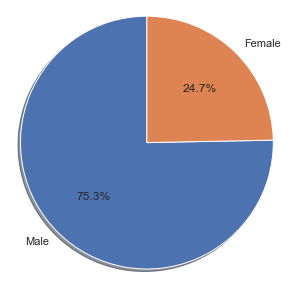

In [18]:
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

Gender_vals = train_data['Gender'].value_counts().tolist()
f, ax = plt.subplots(figsize=(5, 5))
labels = ['Male', 'Female']
plt.pie(Gender_vals, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
#         colors= ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
       )
axis = plt.axis('equal')
plt.style.use(('ggplot'))

### Observe purchase amount effect based on gender and their martital status.

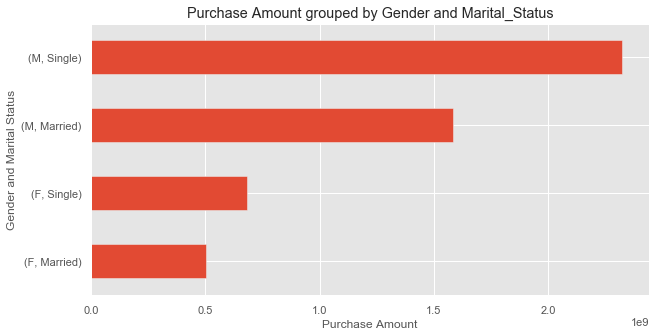

In [19]:
groupby=train_data.groupby(['Gender','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Gender and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Gender and Marital Status')
plt.style.use(('ggplot'))

### Observe purchase amount based on person age and marital status.

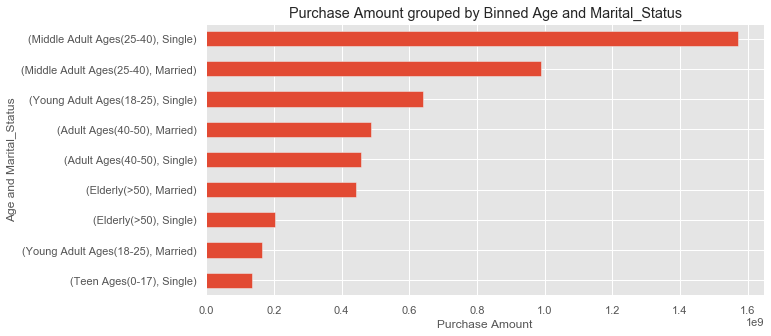

In [20]:
groupby=train_data.groupby(['Binned_Age','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Binned Age and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Marital_Status')
plt.style.use(('ggplot'))

### Observe purchase amount based on person occupation.

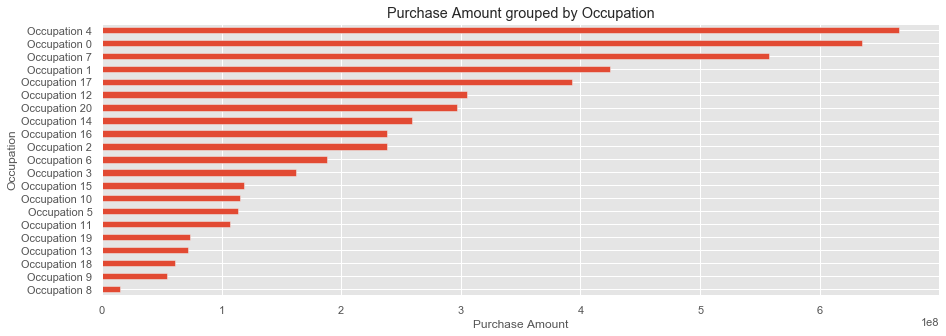

In [21]:
groupby=train_data.groupby('Occupation').sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(15, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person age and occupation. 

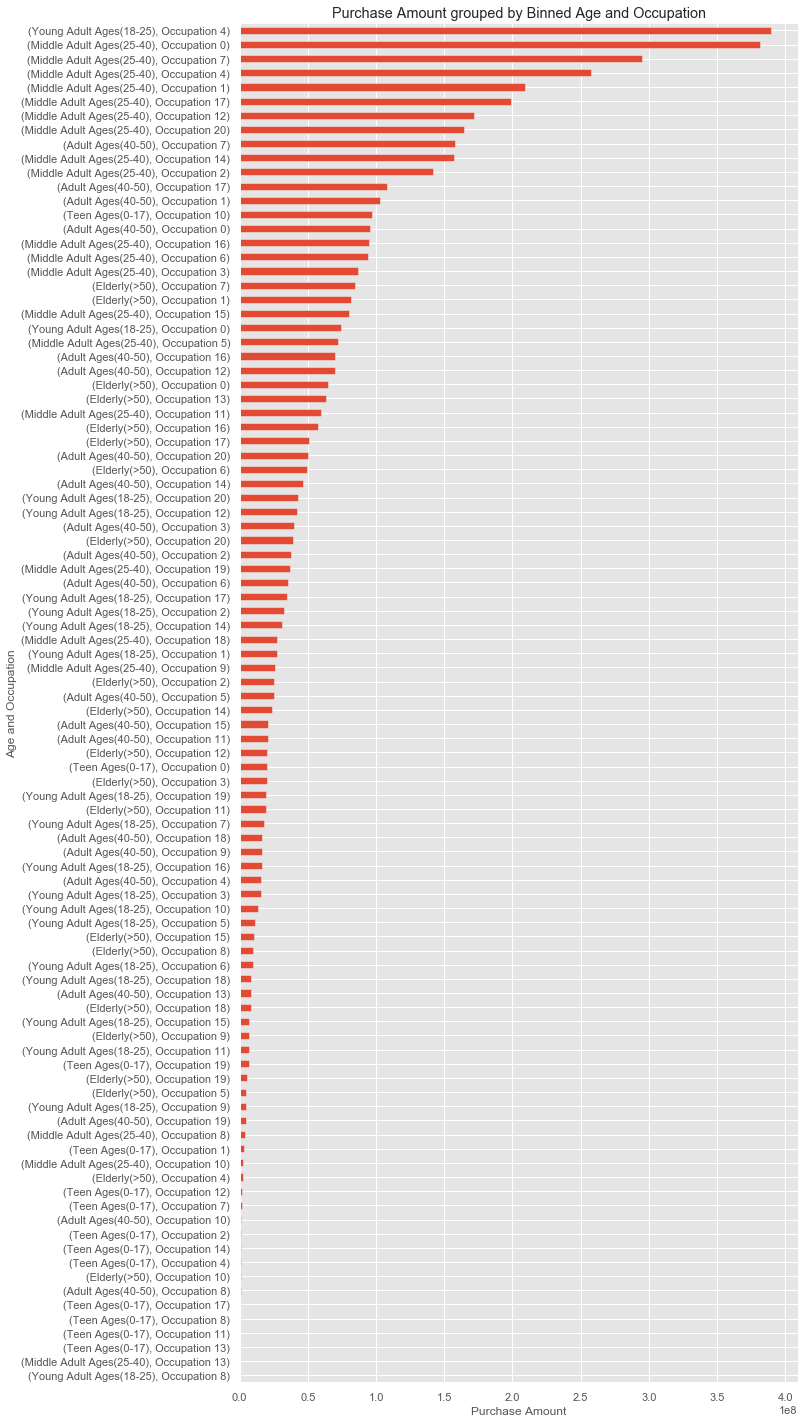

In [22]:
groupby=train_data.groupby(['Binned_Age','Occupation']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 25))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Binned Age and Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person occupation and city category.

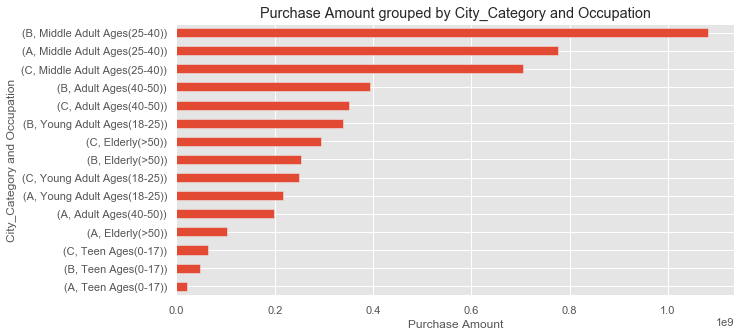

In [23]:
groupby=train_data.groupby(['City_Category','Binned_Age']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by City_Category and Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('City_Category and Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person staying in the city for number of years.

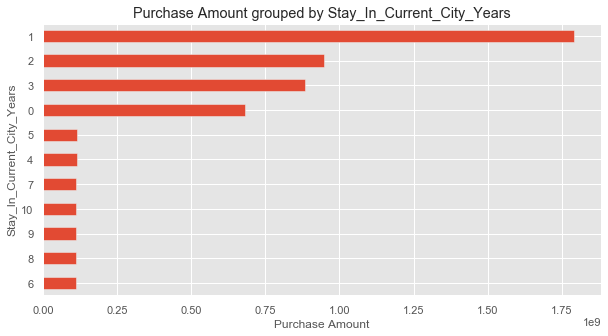

In [24]:
groupby=train_data.groupby(['Stay_In_Current_City_Years']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Stay_In_Current_City_Years')
plt.xlabel('Purchase Amount')
plt.ylabel('Stay_In_Current_City_Years')
plt.style.use(('ggplot'))

### Observe purchase amount based on customers maritial status.

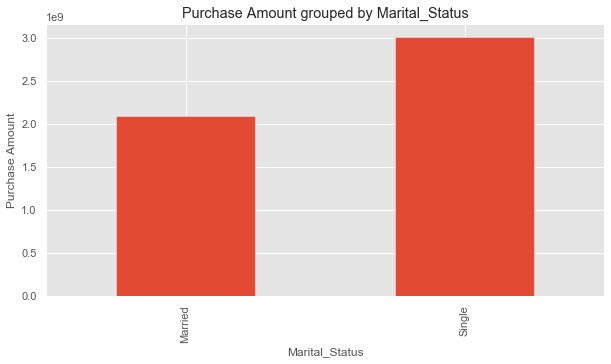

In [25]:
groupby=train_data.groupby('Marital_Status').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by Marital_Status')
plt.ylabel('Purchase Amount')
plt.xlabel('Marital_Status')
plt.style.use(('ggplot'))

### Observe purchase amount by city category.

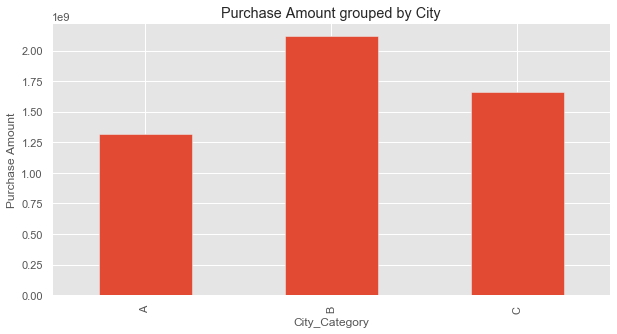

In [26]:
groupby=train_data.groupby('City_Category').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by City')
plt.ylabel('Purchase Amount')
plt.xlabel('City_Category')
plt.style.use(('ggplot'))

### Find the most bought product and its count.

In [27]:
print("The most bought Product: ", train_data.Product_ID.loc[train_data.Product_Count==np.max(train_data.Product_Count.unique())].unique()[0])
print('The most bought prouduct count: ', np.max(train_data.Product_Count.unique()))

The most bought Product:  P00265242
The most bought prouduct count:  1880


### Observe most bought product based on city category.

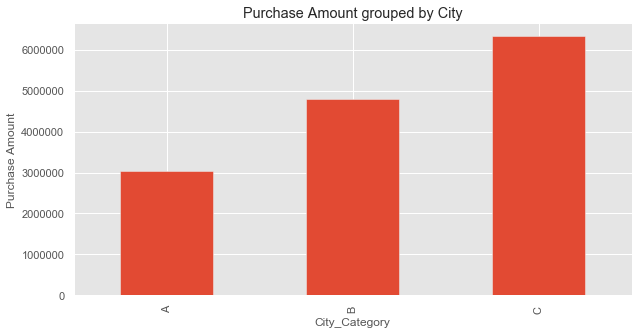

In [28]:
groupby=train_data.loc[train_data.Product_ID=='P00265242'].groupby('City_Category').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by City') 
plt.ylabel('Purchase Amount')
plt.xlabel('City_Category')
plt.style.use(('ggplot'))

### Find the user who has bought the maximum number of products.

In [29]:
print ("The user who has bought maximum number of products: ", train_data.User_ID.loc[train_data.User_Count==np.max(train_data.User_Count.unique())].unique()[0])

The user who has bought maximum number of products:  1001680


### Products which the user who has bought most number of products.

In [30]:
train_data.loc[train_data.User_ID==1001680]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count,Product_Category_Count,Binned_Age
11055,1001680,P00036742,M,26,Occupation 20,A,3,Married,1,16,NA,15670,1026,185,2,Middle Adult Ages(25-40)
11056,1001680,P00130642,M,26,Occupation 20,A,3,Married,11,16,NA,6139,1026,485,2,Middle Adult Ages(25-40)
11057,1001680,P00105442,M,26,Occupation 20,A,3,Married,11,NA,NA,7607,1026,125,1,Middle Adult Ages(25-40)
11058,1001680,P00245642,M,26,Occupation 20,A,3,Married,5,11,12,8715,1026,691,3,Middle Adult Ages(25-40)
11059,1001680,P00123342,M,26,Occupation 20,A,3,Married,11,NA,NA,4472,1026,19,1,Middle Adult Ages(25-40)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517447,1001680,P00238742,M,26,Occupation 20,A,3,Married,13,NA,NA,774,1026,122,1,Middle Adult Ages(25-40)
517448,1001680,P00146742,M,26,Occupation 20,A,3,Married,1,13,14,4227,1026,448,3,Middle Adult Ages(25-40)
517449,1001680,P00285042,M,26,Occupation 20,A,3,Married,16,NA,NA,4825,1026,29,1,Middle Adult Ages(25-40)
517450,1001680,P00047742,M,26,Occupation 20,A,3,Married,16,NA,NA,12539,1026,94,1,Middle Adult Ages(25-40)


### Total number of users who shopped during black friday.

In [31]:
len(train_data.User_ID.unique())

5891